<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/09_Decision_Tree/Exercise_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: 

*   Build decision tree model to predict survival based on certain parameters
*   csv file : 09_Decision_Tree/exercise_titanic.csv
*   In this file using following columns build a model to predict if person would survive or not,

      Pclass

      Sex

      Age

      Fare
*   Calculate score of your model


Let load the data

In [9]:
import pandas as pd

In [10]:
#For local notebook
df = pd.read_csv('/content/exercise_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
#from google.colab import files

#uploaded = files.upload()

In [12]:
#import io

#df = pd.read_csv(io.StringIO(uploaded['exercise_titanic.csv'].decode('utf-8')))
#df.head()

In [27]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Since our prediction is based on only (Pclass, Sex, Age, Fare) and 'Survived' os our target variable lets drop the other columns

In [13]:
df_final = df.drop(['PassengerId', 'Name', 'SibSp','Parch', 'Ticket', 'Cabin' ,'Embarked'],axis= 'columns')
df_final.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


Cross check for every input column there shouldnt be a null value

In [14]:
print(df_final.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64


In [15]:
df_final.Age[:10] #get first 10 values

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

distribution  age -> Symmertric - Mean
Median

Since Age column has null values, lets replace them with 'mean' valuesm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


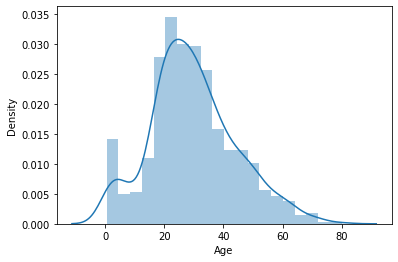

In [18]:
import seaborn as sns
sns.distplot(df_final['Age'])

In [19]:
df_final.Age = df_final.Age.fillna(df_final.Age.mean())
df_final.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [20]:
print(df_final.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


Now lets use OneHotEncoding for 'Sex' column

In [21]:
from sklearn.preprocessing import LabelEncoder # importing LabelEncoder class

le_Sex = LabelEncoder() # classifier of class LabelEncoder
df_final['Sex_n'] = le_Sex.fit_transform(df_final['Sex'])
df_final.head()

,Survived,Pclass,Sex,Age,Fare,Sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


Now lets drop the 'Sex' column

In [22]:
df_final = df_final.drop(['Sex'],axis='columns')
df_final.head()

,Survived,Pclass,Age,Fare,Sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


Now lets create inputs variable

In [ ]:
inputs = df_final.drop(['Survived'],axis='columns')
inputs.head()

Now leats create target variable

In [ ]:
target = df_final['Survived']
target.head()

Now lets split the dataset into training and test

In [25]:
from sklearn.model_selection import train_test_split # importing a class
X_train ,X_test, y_train,y_test = train_test_split(inputs,target,test_size=0.2)

print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))


len of X_train is 712
len of X_test is 179
len of y_train is 712
len of y_test is 179


Now lets train the model

In [28]:
from sklearn import tree # importing tree class

model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
model.score(X_test,y_test)

0.7877094972067039